# Load and preprocess dataset

In [105]:
import pandas as pd
df = pd.read_csv('/Users/julia_welch/code/GenreGuesser/raw_data/full_df.csv')
df.head()

,Unnamed: 0,Lyrics,Genre
0,0,NaN,100
1,1,[Intro: DJ Khaled]This for the hood (This for ...,100
2,2,"[Intro: Yung Joc]Hey love, you remember your f...",100
3,4,[Intro: 50 Cent]New York CityYou are now rappi...,100
4,5,[Intro]You ain't got enough stamps in ya passp...,100


In [106]:
df = df.drop_duplicates().reset_index(drop = True)

In [107]:
df = df.dropna()

In [108]:
df = df[['Lyrics', 'Genre']]

In [109]:
GENRE_DICT = {
    '100' : 'rap',
    100 : 'rap',
    '73' : 'pop',
    73 : 'pop',
    '38' : 'country',
    38 : 'country',
    '114' : 'rock',
    114 : 'rock',
    '57' : 'folk',
    57 : 'folk',
    '62' : 'jazz',
    62 : 'jazz',
    'smooth-jazz': 'jazz',
    }

df['Genre'] = df['Genre'].apply(lambda x : GENRE_DICT[x] if x in GENRE_DICT.keys() else x)

In [110]:
import re
import string
import nltk
nltk.download('stopwords', quiet = True)
nltk.download('punkt', quiet = True)
nltk.download('wordnet', quiet = True)
nltk.download('omw-1.4', quiet = True)
from nltk.corpus import stopwords

from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

def clean_text(text):
    #remove 'е'
    text = text.replace('е', 'e')
    
    #remove headers like [Chorus] etc
    headers = re.findall(r"\[(.*?)\]", text)
    for header in headers:
        text = text.replace(f'[{header}]', ' ')

    #separate lower/upper case words (like 'needHow')
    cap_sep_find = r'([a-z])([A-Z])'
    cap_sep_replace = r'\1 \2'
    text = re.sub(cap_sep_find, cap_sep_replace, text)

    #remove punctuation
    exclude = string.punctuation + "’‘”“"
    for punctuation in exclude:
           text = text.replace(punctuation, ' ')

    #turn text into lowercase
    text = text.lower()

    #remove numericals
    text = ''.join(word for word in text if not word.isdigit())

    #remove stopwords
    stop_words = set(stopwords.words('english'))

    #tokenise
    word_tokens = word_tokenize(text)
    text = [w for w in word_tokens if not w in stop_words]

    #lemmatise
    lemmatizer = WordNetLemmatizer()
    lemmatized = [lemmatizer.lemmatize(word) for word in text]
    text = lemmatized

    text = ' '.join(text)

    #rejoin "wan na"/"gon na" to "wanna"/"gonna"
    wannas = re.findall(r"wan na", text)
    gonnas = re.findall(r"gon na", text)
    gottas = re.findall(r"got ta", text)

    for wanna in wannas:
        text = text.replace(wanna, "wanna")

    for gonna in gonnas:
        text = text.replace(gonna, "gonna")

    for gotta in gottas:
        text = text.replace(gotta, "gotta")

    return text

In [111]:
df['Lyrics'] = df['Lyrics'].apply(clean_text)

In [112]:
df.head()

,Lyrics,Genre
1,hood hood ghetto ghetto nigga getting money mo...,rap
2,hey love remember first time new joc city get ...,rap
3,new york city rappin cent gotta love wanna chi...,rap
4,got enough stamp ya passport fuck young h hehe...,rap
5,hold hold hold slow slow listen give minute we...,rap


# Explore full dataset

In [113]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10783 entries, 1 to 10792
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Lyrics  10783 non-null  object
 1   Genre   10783 non-null  object
dtypes: object(2)
memory usage: 252.7+ KB


In [114]:
df.shape

(10783, 2)

In [115]:
df.Genre.value_counts()

rock       6150
pop        1883
country    1872
rap         539
jazz        318
folk         21
Name: Genre, dtype: int64

# Handle unknown characters in raw data

In [3]:
from nltk.corpus import words
import nltk
nltk.download('words')

[nltk_data] Downloading package words to
[nltk_data]     /Users/julia_welch/nltk_data...
[nltk_data]   Unzipping corpora/words.zip.


True

In [5]:
'rosé' in words.words()

False

In [116]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vec = TfidfVectorizer()
X = tfidf_vec.fit_transform(df['Lyrics'])
X.toarray()

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [117]:
tfidf_df = pd.DataFrame(X.toarray(), columns = tfidf_vec.get_feature_names_out())
tfidf_df

,aa,aaa,aaaa,aaaaaaaaaaaah,aaaaaaaah,aaaaaaah,aaaaaah,aaaaaahhhhh,aaaaaaoooh,aaaaaooooow,...,품격,하고픈게,하는건지알랑가몰라,한잔의,함께,해있잖아,향한,허리,헉소리나게악소리,화끈해야
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10778,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10779,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10780,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10781,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [118]:
tfidf_df.filter(regex = r'[^a-zA-Z0-9 -]').columns.values.tolist()

['abraça',
 'accordés',
 'achève',
 'adeverinţăsol',
 'adiós',
 'adâncâ',
 'ahí',
 'alegría',
 'allée',
 'allí',
 'amoré',
 'amoè',
 'amándote',
 'amènent',
 'anatomía',
 'andalé',
 'andaléhow',
 'andré',
 'appétit',
 'aprindși',
 'après',
 'aquí',
 'arpègent',
 'así',
 'ataciși',
 'até',
 'aşternut',
 'aș',
 'baby나는',
 'baião',
 'balançado',
 'balanço',
 'baîllant',
 'bebé',
 'bebétaki',
 'beyoncé',
 'beyoncébut',
 'bimé',
 'bomé',
 'bouffée',
 'braţe',
 'brûlée',
 'báilalo',
 'báilame',
 'bésame',
 'cabrón',
 'caché',
 'café',
 'caféin',
 'cafélet',
 'caféoh',
 'cafés',
 'caféwhy',
 'cambiará',
 'canciónáfrica',
 'canção',
 'capitán',
 'cariño',
 'cearăfluturi',
 'cheamă',
 'chloé',
 'châteauneuf',
 'ché',
 'chéri',
 'cinquième',
 'cirés',
 'ciudatși',
 'cliché',
 'clichécan',
 'clichéi',
 'clichés',
 'clichéwhat',
 'clichéwho',
 'cocaína',
 'compliquées',
 'condición',
 'corazón',
 'coração',
 'cotés',
 'crazy자',
 'creído',
 'cruntă',
 'crème',
 'crêpes',
 'crüe',
 'cuestión',
 'cuá

In [122]:
#for loop to find frequency of strings with foreign chars
word_list = tfidf_df.filter(regex = r'[^a-zA-Z0-9 -]').columns.values.tolist()

word_num = []

for word in word_list:
    word_num.append([word, len(df[df['Lyrics'].str.contains(word)])])

word_df = pd.DataFrame(word_num, columns = ['word', 'freq'])
len(word_list)

725

In [120]:
word_df.sort_values(by = 'freq', ascending = False)

,word,freq
351,sé,19
62,ché,14
220,lé,11
134,está,11
67,cliché,9
...,...,...
258,măstrigă,1
259,măvirgulă,1
260,măîn,1
262,ninguém,1


In [140]:
s = df['Lyrics']
result = [i for i in s if not re.findall("[^\u0000-\u05C0\u2100-\u214F]+",i)]

In [146]:
df1 = df[df['Lyrics'].str.contains(r'[^a-zA-Z0-9 -]')]
print(df1.shape)
#df1.iloc[2]['Lyrics']

df3 = df[df['Lyrics'].str.contains(r"[^\u0000-\u05C0\u2100-\u214F]+")]
print(df3.shape)
#df3.iloc[2]['Lyrics']

(513, 2)
(313, 2)


In [150]:
def is_english(text):
    return text.isascii()

print(is_english("Test"))
print(is_english("_1991_اف_جي2"))

True
False


In [101]:
def clear_char(text):
    text = text.replace('е', 'e')
    return text

In [102]:
df['Lyrics'] = df['Lyrics'].apply(clear_char)

In [136]:
df2 = df[df['Lyrics'].str.contains('é')]
len(df2)
df1.iloc[0]['Lyrics']

'got enough stamp ya passport fuck young h heheheh international uhh show young boy thing maturation jay zeezy heh check new nigga hot still uhh better broad better automobile uhh bet yard naw bet hundred mil song end probably start another trend know everything wan age brand new ac coupe guess could say legend begun young enough know right car buy yet grown enough put rim got six deuce curtain see even put tint got bright watch got right watch buy bar bought nightspot got right stock got stockbroker movin like white top know like fuck child abuse call dyfs must getting nicer young boy ready real new nigga hot still used let pant sag givin fuck baby boy grown used cruise used car lot put chrome truck baby boy grown used play block like like used carry knot like like got black card good credit baby boy cause grown taha new nigga fire still young boy like fire drill uhh false alarm uhh next naw got uhh next one young still yeah still like mike gotta stop playin child chea bully buck boot

In [139]:
text = "rosé"

encoded_string = text.encode("ascii", "ignore")
decode_string = encoded_string.decode()

print(decode_string)

ros


In [52]:
df['Lyrics']
е

# Get Term Frequency for whole dataset

In [79]:
df.loc[df.iloc[:,0].str.contains(r'[^a-zA-Z0-9 -]')]

,Lyrics,Genre
4,got enough stamp ya passport fuck young h hehe...,rap
17,body movin body movin body movin body movin bo...,rap
18,kick little something car bumping yeah aight n...,rap
20,brass monkey funky monkey brass monkey junkie ...,rap
22,marshall sound like sosholy wack unlyrical lyr...,rap
...,...,...
10771,trap trap money benny shit got feeling gotta r...,pop
10775,heard told friend type really feel call last n...,pop
10777,enviyon mix still see shadow room take back lo...,pop
10790,oh yeah uh c mon yeah typical kinda thing felt...,pop


In [80]:
#get words with non-english characters out
len(tfidf_df.filter(regex = r'[^a-zA-Z0-9 -]').columns.values.tolist())

860

In [78]:
#tfidf score sum
tfidf_df['know'].sum()

332.8513151372586

In [79]:
#get the top n terms with the highest tfidf score
importance = np.argsort(np.asarray(tfidf_df.sum(axis=0)).ravel())[::-1]
tfidf_feature_names = np.array(tfidf_vec.get_feature_names_out())

In [80]:
tfidf_feature_names[importance[:100]]

array(['love', 'oh', 'know', 'yeah', 'like', 'got', 'baby', 'go', 'get',
       'one', 'time', 'want', 'let', 'come', 'never', 'take', 'make',
       'way', 'say', 'see', 'back', 'feel', 'gonna', 'girl', 'away',
       'cause', 'day', 'wanna', 'heart', 'right', 'night', 'need', 'ooh',
       'could', 'life', 'little', 'thing', 'tell', 'good', 'hey', 'give',
       'man', 'world', 'well', 'think', 'long', 'said', 'look', 'keep',
       'around', 'every', 'eye', 'still', 'ever', 'would', 'tonight',
       'always', 'hold', 'find', 'mind', 'hand', 'home', 'light',
       'everything', 'dream', 'nothing', 'gone', 'turn', 'believe',
       'better', 'something', 'going', 'really', 'la', 'boy', 'much',
       'gotta', 'na', 'another', 'run', 'alone', 'leave', 'live', 'fall',
       'hear', 'call', 'stay', 'stop', 'try', 'friend', 'head', 'put',
       'old', 'cry', 'ah', 'last', 'dance', 'even', 'show', 'made'],
      dtype=object)

# Sort by genre, then highest tfidf score

## Rap

In [81]:
df_rap = df.loc[df['Genre'] == 'rap', ['Lyrics', 'Genre']]
df_rap.head()

,Lyrics,Genre
1,hood hood ghetto ghetto nigga getting money mo...,rap
2,hey love remember first time new joc city get ...,rap
3,new york city rappin cent gotta love wanna chi...,rap
4,got enough stamp ya passport fuck young h hehe...,rap
5,hold hold hold slow slow listen give minute we...,rap


In [95]:
from collections import Counter
dt = df_rap['Lyrics']
word_count = Counter(" ".join(dt).split()).most_common()
word_frequency = pd.DataFrame(word_count, columns = ['Word', 'Frequency'])
word_frequency

,Word,Frequency
0,yeah,3008
1,like,2907
2,got,2401
3,get,2167
4,nigga,2081
...,...,...
12112,ymcm,1
12113,zit,1
12114,rubik,1
12115,klitschko,1


In [88]:
#tfid df for rap
tfid_vec = TfidfVectorizer()
X_rap = tfidf_vec.fit_transform(df_rap['Lyrics'])
X_rap.toarray()
tfidf_df_rap = pd.DataFrame(X_rap.toarray(), columns = tfidf_vec.get_feature_names_out())
tfidf_df_rap.head()

,aa,aaaa,aaaah,aagh,aaieeahaaa,aaliyah,aaron,ab,abandoned,abdomen,...,패기,푸는,품격,하고픈게,하는건지알랑가몰라,한잔의,해있잖아,허리,헉소리나게악소리,화끈해야
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [83]:
#get the top n terms with the highest tfidf score
importance = np.argsort(np.asarray(tfidf_df_rap.sum(axis=0)).ravel())[::-1]
tfidf_feature_names_rap = np.array(tfidf_vec.get_feature_names_out())
tfidf_feature_names_rap[importance[:100]]

array(['yeah', 'like', 'nigga', 'got', 'get', 'know', 'love', 'bitch',
       'baby', 'oh', 'ayy', 'go', 'shit', 'girl', 'one', 'back', 'let',
       'fuck', 'ooh', 'uh', 'wanna', 'make', 'want', 'cause', 'see', 'ya',
       'time', 'right', 'say', 'come', 'em', 'man', 'money', 'hey',
       'gotta', 'way', 'tell', 'take', 'never', 'need', 'gon', 'look',
       'said', 'still', 'as', 'life', 'good', 'put', 'feel', 'real',
       'give', 'woo', 'huh', 'boy', 'day', 'keep', 'ah', 'night',
       'really', 'even', 'hit', 'new', 'thing', 'gonna', 'lil', 'big',
       'friend', 'think', 'hoe', 'bout', 'could', 'bad', 'around', 'mind',
       'tryna', 'world', 'every', 'pussy', 'ride', 'turn', 'call',
       'better', 'high', 'head', 'hot', 'fuckin', 'show', 'walk', 'play',
       'woah', 'watch', 'would', 'two', 'yo', 'nothin', 'made', 'done',
       'little', 'told', 'ever'], dtype=object)

## Rock

In [86]:
df_rock = df.loc[df['Genre'] == 'rock', ['Lyrics', 'Genre']]
df_rock.head()

,Lyrics,Genre
2415,saturday night tap drip strip light sitting ki...,rock
2416,dizzy close eye love sick wanna tonight desper...,rock
2417,turn back broken hearted thing meant still bel...,rock
2418,nobody know put secret clothes lie meadow hand...,rock
2419,everyone feel good room swing two chord cool h...,rock


In [96]:
from collections import Counter
dt = df_rock['Lyrics']
word_count = Counter(" ".join(dt).split()).most_common()
word_frequency = pd.DataFrame(word_count, columns = ['Word', 'Frequency'])
word_frequency

,Word,Frequency
0,oh,11826
1,love,10513
2,know,9759
3,like,7768
4,yeah,7743
...,...,...
19801,devoured,1
19802,briefly,1
19803,isometimes,1
19804,stupidest,1


In [89]:
#tfid df for rock
tfid_vec = TfidfVectorizer()
X_rock = tfidf_vec.fit_transform(df_rock['Lyrics'])
X_rock.toarray()
tfidf_df_rock = pd.DataFrame(X_rock.toarray(), columns = tfidf_vec.get_feature_names_out())
tfidf_df_rock.head()

,aa,aaa,aaaaaaaah,aaaaaaah,aaaaaah,aaaaaahhhhh,aaaaaaoooh,aaaaaooooow,aaaah,aaaahh,...,우주의,웃으며,잊은,잠시니까너는,잡아we,주는,지금처럼,채나,편했었지길어진,함께
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [90]:
#get the top n terms with the highest tfidf score
importance = np.argsort(np.asarray(tfidf_df_rock.sum(axis=0)).ravel())[::-1]
tfidf_feature_names_rock = np.array(tfidf_vec.get_feature_names_out())
tfidf_feature_names_rock[importance[:100]]

array(['love', 'oh', 'know', 'yeah', 'like', 'go', 'time', 'got', 'come',
       'get', 'one', 'want', 'never', 'let', 'baby', 'take', 'see', 'way',
       'say', 'away', 'feel', 'make', 'back', 'day', 'gonna', 'life',
       'could', 'ooh', 'heart', 'need', 'night', 'right', 'cause',
       'thing', 'tell', 'hey', 'well', 'wanna', 'world', 'give', 'long',
       'little', 'girl', 'around', 'man', 'good', 'think', 'said', 'eye',
       'look', 'keep', 'still', 'would', 'mind', 'ever', 'find',
       'tonight', 'hold', 'nothing', 'light', 'dream', 'gone', 'home',
       'hand', 'always', 'every', 'everything', 'believe', 'something',
       'run', 'going', 'better', 'turn', 'alone', 'another', 'fall', 'ah',
       'really', 'live', 'hear', 'head', 'inside', 'much', 'leave', 'la',
       'change', 'stop', 'cry', 'sun', 'try', 'stay', 'face', 'rock',
       'na', 'fire', 'end', 'hard', 'friend', 'boy', 'place'],
      dtype=object)

## Pop

In [97]:
df_pop = df.loc[df['Genre'] == 'pop', ['Lyrics', 'Genre']]
df_pop.head()

,Lyrics,Genre
207,woo uh woo na na na na na oh uh uh na na na na...,pop
208,one two three four tell love sleepless long ni...,pop
209,simona getting older journey etched skin simon...,pop
210,worry hurt want fun dreamin wrote forgive go a...,pop
211,point phife tip point phife tip point phife ti...,pop


In [98]:
dt = df_pop['Lyrics']
word_count = Counter(" ".join(dt).split()).most_common()
word_frequency = pd.DataFrame(word_count, columns = ['Word', 'Frequency'])
word_frequency

,Word,Frequency
0,oh,9077
1,love,6424
2,know,5289
3,yeah,4992
4,like,4913
...,...,...
12058,enchant,1
12059,encaptured,1
12060,enamoured,1
12061,truthfully,1


## Country

In [99]:
df_country = df.loc[df['Genre'] == 'country', ['Lyrics', 'Genre']]
df_country.head()

,Lyrics,Genre
1525,verse operator please connect need make apolog...,country
1526,bound leave known sure something leave smile k...,country
1527,say know say anything one day rollin clover ne...,country
1528,want mind carl like stay help u song play guit...,country
1529,need whole lot money turn lottery need little ...,country


In [101]:
dt = df_country['Lyrics']
word_count = Counter(" ".join(dt).split()).most_common()
word_frequency = pd.DataFrame(word_count, columns = ['Word', 'Frequency'])
word_frequency[5:]

,Word,Frequency
5,oh,2560
6,get,2297
7,one,2242
8,little,2161
9,time,2126
...,...,...
8518,bumper,1
8519,honkin,1
8520,deadline,1
8521,wheeled,1


# Get Bag of Words representation for every genre, apply log for custom scoring

## Rap

In [106]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer()

X_rap = vectorizer.fit_transform(df_rap['Lyrics'])
X_rap.toarray()
cv_df_rap = pd.DataFrame(X_rap.toarray(), columns = vectorizer.get_feature_names_out())
cv_df_rap.head()

,aa,aaaa,aaaah,aagh,aaieeahaaa,aaliyah,aaron,ab,abandoned,abdomen,...,패기,푸는,품격,하고픈게,하는건지알랑가몰라,한잔의,해있잖아,허리,헉소리나게악소리,화끈해야
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [114]:
cv_df_rap.max().sort_values(ascending = False)

ody        172
drop       168
woman      150
la         146
lie        140
          ... 
health       1
hearing      1
hears        1
hearse       1
화끈해야         1
Length: 11975, dtype: int64

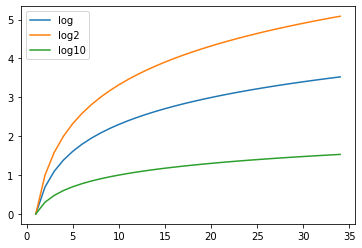

In [168]:
import matplotlib.pyplot as plt
import numpy as np

X = np.arange(1,35,1)
y = [np.log(x) for x in X]
y2 = [np.log2(x) for x in X]
y10 = [np.log10(x) for x in X]
y1p = [np.log1p(x) for x in X]

plt.plot(X, y, label = 'log')
plt.plot(X, y2, label = 'log2')
plt.plot(X, y10, label = 'log10')
#plt.plot(X, y1p, label = 'log1p')

plt.legend();

In [155]:
numbers = [1, 2, 3, 4, 5, 50]
print(np.log(numbers))

[0.         0.69314718 1.09861229 1.38629436 1.60943791 3.91202301]


In [156]:
numbers = [1, 2, 3, 4, 5, 50]
print(np.log2(numbers))

[0.         1.         1.5849625  2.         2.32192809 5.64385619]


In [157]:
numbers = [1, 2, 3, 4, 5, 50]
print(np.log10(numbers))

[0.         0.30103    0.47712125 0.60205999 0.69897    1.69897   ]


In [130]:
import math
logs = [math.log(x) for x in numbers]
print(logs)

[0.0, 0.6931471805599453, 1.0986122886681098, 1.3862943611198906, 1.6094379124341003, 3.912023005428146]


In [145]:
cv_log_rap = cv_df_rap.applymap(lambda x: np.log(x) if x > 0 else x)
cv_log_rap.head()

,aa,aaaa,aaaah,aagh,aaieeahaaa,aaliyah,aaron,ab,abandoned,abdomen,...,패기,푸는,품격,하고픈게,하는건지알랑가몰라,한잔의,해있잖아,허리,헉소리나게악소리,화끈해야
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [165]:
cv_log2_rap = cv_df_rap.applymap(lambda x: np.log2(x) if x > 0 else x)
cv_log2_rap.head()

,aa,aaaa,aaaah,aagh,aaieeahaaa,aaliyah,aaron,ab,abandoned,abdomen,...,패기,푸는,품격,하고픈게,하는건지알랑가몰라,한잔의,해있잖아,허리,헉소리나게악소리,화끈해야
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [146]:
cv_log_rap.max().sort_values(ascending = False)

ody        5.147494
drop       5.123964
woman      5.010635
la         4.983607
lie        4.941642
             ...   
health     0.000000
hearing    0.000000
hears      0.000000
hearse     0.000000
화끈해야       0.000000
Length: 11975, dtype: float64

In [167]:
cv_log2_rap.max().sort_values(ascending = False)

ody        7.426265
drop       7.392317
woman      7.228819
la         7.189825
lie        7.129283
             ...   
health     0.000000
hearing    0.000000
hears      0.000000
hearse     0.000000
화끈해야       0.000000
Length: 11975, dtype: float64

<AxesSubplot:ylabel='Count'>

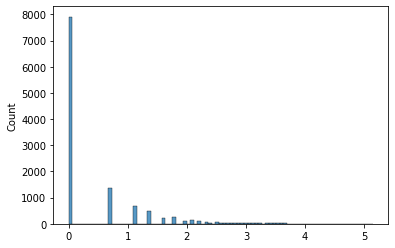

In [152]:
import seaborn as sns

sns.histplot(data = cv_log_rap.max())